In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.3, random_state=42)

print(len(x_train), len(y_train))
print(len(x_val), len(y_val))


35000 35000
15000 15000


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

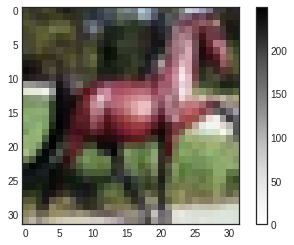

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 데이터 형태(shape) 변형
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)


In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(35000, 3072)
(15000, 3072)
(10000, 3072)


In [8]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [10]:
model = models.Sequential()
model.add(layers.Input(shape=(3072), name='input_15'))
model.add(layers.Dense(2048, activation='relu', name='dense_91'))
model.add(layers.BatchNormalization(name='batch_normalization_66'))
model.add(layers.Activation('relu', name='activation_66'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, name='dense_92'))
model.add(layers.BatchNormalization(name='batch_normalization_67'))
model.add(layers.Activation('relu', name='activation_67'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', name='dense_93'))
model.add(layers.BatchNormalization(name='batch_normalization_68'))
model.add(layers.Activation('softmax', name='activation_68'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='softmax', name='dense_94'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_66 (Batc (None, 2048)              8192      
_________________________________________________________________
activation_66 (Activation)   (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_67 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_67 (Activation)   (None, 1024)              0

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백 정의
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 모델 학습
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])


Epoch 1/10
274/274 [==============================] - 5s 10ms/step - loss: -0.4334 - accuracy: 0.1007 - val_loss: -1.2615 - val_accuracy: 0.0985

Epoch 00001: val_loss improved from inf to -1.26150, saving model to best_model.h5
Epoch 2/10
274/274 [==============================] - 2s 7ms/step - loss: -2.3635 - accuracy: 0.1007 - val_loss: -3.2660 - val_accuracy: 0.0985

Epoch 00002: val_loss improved from -1.26150 to -3.26599, saving model to best_model.h5
Epoch 3/10
274/274 [==============================] - 2s 7ms/step - loss: -4.4696 - accuracy: 0.1007 - val_loss: -5.3656 - val_accuracy: 0.0985

Epoch 00003: val_loss improved from -3.26599 to -5.36563, saving model to best_model.h5
Epoch 4/10
274/274 [==============================] - 2s 8ms/step - loss: -6.8225 - accuracy: 0.1007 - val_loss: -7.5804 - val_accuracy: 0.0985

Epoch 00004: val_loss improved from -5.36563 to -7.58038, saving model to best_model.h5
Epoch 5/10
274/274 [==============================] - 3s 10ms/step - los

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

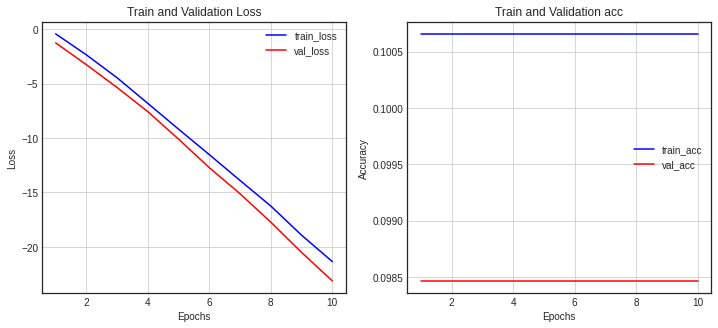

In [20]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_acc')
ax2.plot(epochs, val_accuracy, 'r-', label='val_acc')
ax2.set_title('Train and Validation acc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: -22.9470 - accuracy: 0.1000


[-22.946990966796875, 0.10000000149011612]